In [ ]:
# import libraries
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [ ]:
url1 = "https://raw.githubusercontent.com/agusabdulrahman/Customer-Segmentation-and-Product-Recommender-System/main/data/customers_dataset.csv"
url2 = "https://raw.githubusercontent.com/agusabdulrahman/Customer-Segmentation-and-Product-Recommender-System/main/data/geolocation_dataset.csv"
url3 = "https://raw.githubusercontent.com/agusabdulrahman/Customer-Segmentation-and-Product-Recommender-System/main/data/order_items_dataset.csv"
url4 = "https://raw.githubusercontent.com/agusabdulrahman/Customer-Segmentation-and-Product-Recommender-System/main/data/order_payments_dataset.csv"
url5 = "https://raw.githubusercontent.com/agusabdulrahman/Customer-Segmentation-and-Product-Recommender-System/main/data/order_reviews_dataset.csv"
url6 = "https://raw.githubusercontent.com/agusabdulrahman/Customer-Segmentation-and-Product-Recommender-System/main/data/orders_dataset.csv"
url7 = "https://raw.githubusercontent.com/agusabdulrahman/Customer-Segmentation-and-Product-Recommender-System/main/data/product_category_name_translation.csv"
url8 = "https://raw.githubusercontent.com/agusabdulrahman/Customer-Segmentation-and-Product-Recommender-System/main/data/products_dataset.csv"
url9 = "https://raw.githubusercontent.com/agusabdulrahman/Customer-Segmentation-and-Product-Recommender-System/main/data/rec_data.csv"
url10 = "https://raw.githubusercontent.com/agusabdulrahman/Customer-Segmentation-and-Product-Recommender-System/main/data/sellers_dataset.csv"


In [ ]:
# read the datasets
cust=pd.read_csv(url1)
geo=pd.read_csv(url2)
od_items=pd.read_csv(url3)
od_payment=pd.read_csv(url4)
od_review= pd.read_csv(url5)
orders=pd.read_csv(url6)
product_cat=pd.read_csv(url7)
products=pd.read_csv(url8)
sellers= pd.read_csv(url10)





## EDA

In [ ]:
# top 5 rows
cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
od_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
od_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
od_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
od_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#Preprocessing

The common column in both orders table and customer table is customer_id. customer_id is used to join the tables.

In [ ]:
# merge orders and cust
order_cust= pd.merge(orders,cust,on='customer_id',how='inner')

In [ ]:
# get extra information about the dataset
order_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
 8   customer_unique_id             99441 non-null  object
 9   customer_zip_code_prefix       99441 non-null  int64 
 10  customer_city                  99441 non-null  object
 11  customer_state                 99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.9+ MB


In [ ]:
# check for null values
order_cust.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [ ]:
df= pd.merge(order_cust,od_items,on='order_id',how='inner')

In [ ]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   customer_unique_id             112650 non-null  object 
 9   customer_zip_code_prefix       112650 non-null  int64  
 10  customer_city                  112650 non-null  object 
 11  customer_state                 112650 non-null  object 
 12  order_item_id                 

In [ ]:
#dropping the columns name customer_id , 'seller_id','shipping_limit_date','customer_zip_code_prefix as they are not of our use in the analysis
df = df.drop(['customer_id', 'seller_id','shipping_limit_date','customer_zip_code_prefix'], axis = 1)
df.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_status                   112650 non-null  object 
 2   order_purchase_timestamp       112650 non-null  object 
 3   order_approved_at              112635 non-null  object 
 4   order_delivered_carrier_date   111456 non-null  object 
 5   order_delivered_customer_date  110196 non-null  object 
 6   order_estimated_delivery_date  112650 non-null  object 
 7   customer_unique_id             112650 non-null  object 
 8   customer_city                  112650 non-null  object 
 9   customer_state                 112650 non-null  object 
 10  order_item_id                  112650 non-null  int64  
 11  product_id                     112650 non-null  object 
 12  price                         

In [ ]:
df['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'canceled',
       'unavailable', 'approved'], dtype=object)

For a company, only deliverd products are beneficial. Rest of the order status like shipped , canceled , unavailable are not of use.

In [ ]:
# filter data with order status as 'delivered'
df=df[df['order_status']=='delivered']
df.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72


Given that every record consistently indicates the order status as "delivered," it is recommended to eliminate the order status column from the dataset.

In [ ]:
# drop order status
df.drop(columns=['order_status'],inplace=True)

# Check Null values

In [ ]:
# check for the null values
df.isna().sum()

order_id                          0
order_purchase_timestamp          0
order_approved_at                15
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
customer_unique_id                0
customer_city                     0
customer_state                    0
order_item_id                     0
product_id                        0
price                             0
freight_value                     0
dtype: int64

It can be seen that the order_approved_at variable contains a missing value indicating that a purchase is not approved by Olist.
Meanwhile, missing value in order_delivered_carrier_date and order_delivered_customer_date indicates product arrival information that was not inputted into the dataset.

In [ ]:
# percentage of null values
(df.isna().sum()/ df.shape[0]).to_frame('percentage of missings')

,percentage of missings
order_id,0.000000
order_purchase_timestamp,0.000000
order_approved_at,0.000136
order_delivered_carrier_date,0.000018
order_delivered_customer_date,0.000073
order_estimated_delivery_date,0.000000
customer_unique_id,0.000000
customer_city,0.000000
customer_state,0.000000
order_item_id,0.000000


It can be seen that the percentage of missing data in this variable is very small.



#Drop Null Values

In [ ]:
# drop all the rows containing null values
df.dropna(inplace=True)

In [ ]:
# check the null values
df.isna().sum()

order_id                         0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
price                            0
freight_value                    0
dtype: int64

# Duplicate Detection

In [ ]:
# check for the duplicate values
df.duplicated().sum()

0

There are no duplicated records.

#Descriptive Statistics

In [ ]:
# use the describe() function
df.describe()

,order_item_id,price,freight_value
count,110173.000000,110173.000000,110173.000000
mean,1.198216,119.978575,19.949051
std,0.706743,182.314081,15.699528
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.900000,16.260000
75%,1.000000,134.170000,21.150000
max,21.000000,6735.000000,409.680000


#Data Transformation

In [ ]:
# check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110173 entries, 0 to 112649
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110173 non-null  object 
 1   order_purchase_timestamp       110173 non-null  object 
 2   order_approved_at              110173 non-null  object 
 3   order_delivered_carrier_date   110173 non-null  object 
 4   order_delivered_customer_date  110173 non-null  object 
 5   order_estimated_delivery_date  110173 non-null  object 
 6   customer_unique_id             110173 non-null  object 
 7   customer_city                  110173 non-null  object 
 8   customer_state                 110173 non-null  object 
 9   order_item_id                  110173 non-null  int64  
 10  product_id                     110173 non-null  object 
 11  price                          110173 non-null  float64
 12  freight_value                 

The columns order_purchase_timestamp,order_approved_at,order_delivered_carrier_date ,order_delivered_customer_date,order_estimated_delivery_date are date and time. Therefore, the columns from 1 to 5 are transformed into datetime data type.

In [ ]:
# change the data type to datetime
#When set to 'coerce', any values that cannot be converted to datetime will be replaced with a NaT (Not-a-Time) value
df.iloc[:,1:6]=df.iloc[:,1:6].apply(pd.to_datetime, errors='coerce')

The above can be done this way too.

df.iloc[:, 1:6] = df.iloc[:, 1:6].apply(lambda x: pd.to_datetime(x, errors='coerce'))


In [ ]:
# change the data type to string
df['order_id']=df['order_id'].astype('str')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110173 entries, 0 to 112649
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110173 non-null  object        
 1   order_purchase_timestamp       110173 non-null  datetime64[ns]
 2   order_approved_at              110173 non-null  datetime64[ns]
 3   order_delivered_carrier_date   110173 non-null  datetime64[ns]
 4   order_delivered_customer_date  110173 non-null  datetime64[ns]
 5   order_estimated_delivery_date  110173 non-null  datetime64[ns]
 6   customer_unique_id             110173 non-null  object        
 7   customer_city                  110173 non-null  object        
 8   customer_state                 110173 non-null  object        
 9   order_item_id                  110173 non-null  int64         
 10  product_id                     110173 non-null  object        
 11  

In [ ]:
df['order_purchase_timestamp'].dt.year.unique()

array([2017, 2018, 2016])

#Create new columns.

In [ ]:
# .strftime() is used to format datetime values as strings.

# %Y is used for year( 2016)
df['purchase_year'] = df['order_purchase_timestamp'].dt.strftime('%Y')

# %b for month abbr (Jan)
df['purchase_month'] = df['order_purchase_timestamp'].dt.strftime('%b')

# %Y-%b for YearMonth (2016-Jan)
df['purchase_yearmonth'] = df['order_purchase_timestamp'].dt.strftime('%Y-%b')

# %a for weekday abbr( Mon)
df['purchase_dayofweek'] = df['order_purchase_timestamp'].dt.strftime('%a')

In [ ]:
# Define the bin edges and labels for the purchase periods
bin_edges = [0, 4, 8, 12, 16, 20, 24]
bin_labels = ['Late Night', 'Early Morning', 'Morning', 'Noon', 'Evening', 'Night']

# Assign the purchase periods based on the hour of order_purchase_timestamp
df['purchase_period'] = pd.cut(df['order_purchase_timestamp'].dt.hour, bins=bin_edges, labels=bin_labels)

In [ ]:
# create a column for month number
df['month_number']=df['order_purchase_timestamp'].dt.strftime('%m')

In [ ]:
df.head()

,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,freight_value,purchase_year,purchase_month,purchase_yearmonth,purchase_dayofweek,purchase_period,month_number
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,8.72,2017,Oct,2017-Oct,Mon,Morning,10
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,2018,Jul,2018-Jul,Tue,Evening,07
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,2018,Aug,2018-Aug,Wed,Early Morning,08
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,2017,Nov,2017-Nov,Sat,Evening,11
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,2018,Feb,2018-Feb,Tue,Night,02


# Data Visualisation


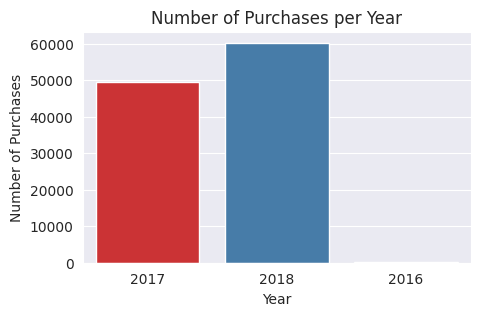

In [ ]:
# a barplot to show the number of purchases
plt.figure(figsize=(5,3))

sns.countplot(x='purchase_year',
            data=df)
plt.xlabel('Year')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases per Year')
plt.show()

In [ ]:
# trend of shopping from 2016-2018

In [ ]:
# %Y-%b for YearMonth (2016-Jan)
df['purchase_yearmonth'] = df['order_purchase_timestamp'].dt.strftime('%Y-%m')

In [ ]:
purchase_month_year=df.groupby(['purchase_yearmonth'])['price'].count()

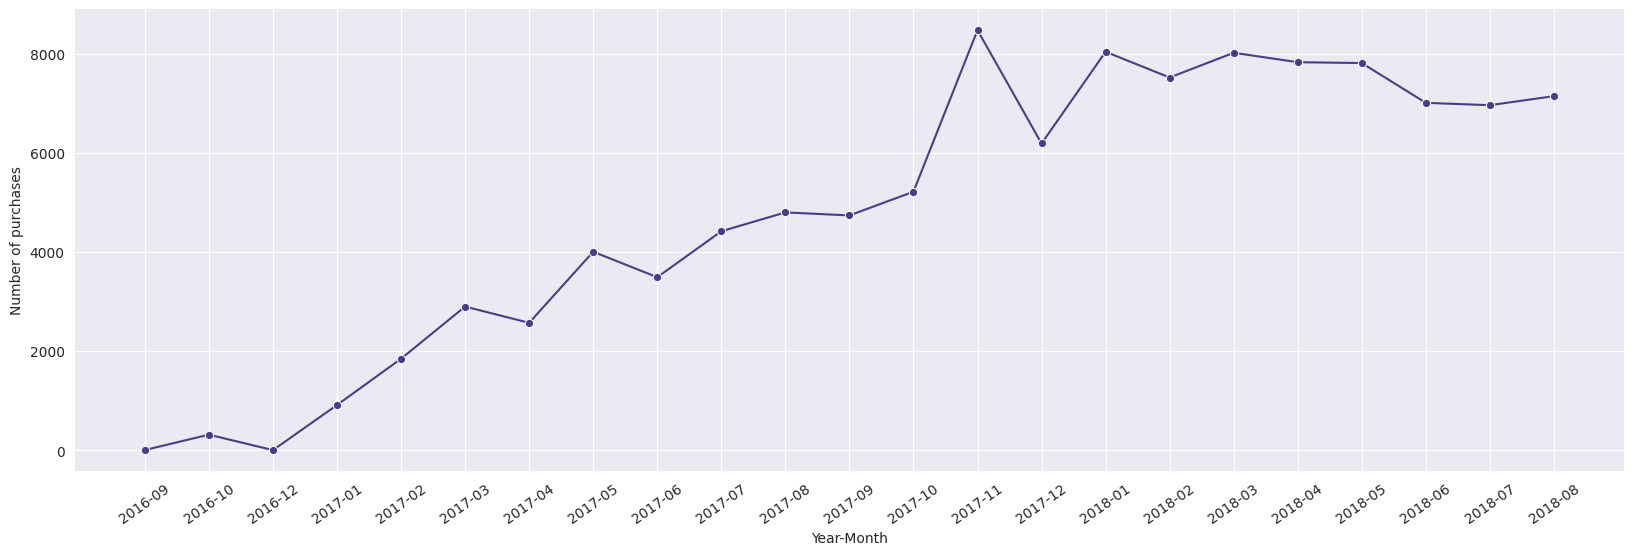

In [ ]:
plt.figure(figsize=(20,6))
plt.grid(True)
# a line plot to show the trend of shopping
sns.lineplot(
            x=purchase_month_year.index,
            y=purchase_month_year.values,
            marker='o',
            color='darkslateblue')
plt.xlabel('Year-Month')
plt.ylabel('Number of purchases')
plt.xticks(rotation=35)
sns.despine()
plt.show()

#Shopping tendency as per time of the day

In [ ]:
df.head()

,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,freight_value,purchase_year,purchase_month,purchase_yearmonth,purchase_dayofweek,purchase_period,month_number
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,8.72,2017,Oct,2017-10,Mon,Morning,10
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,2018,Jul,2018-07,Tue,Evening,07
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,2018,Aug,2018-08,Wed,Early Morning,08
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,2017,Nov,2017-11,Sat,Evening,11
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,2018,Feb,2018-02,Tue,Night,02


Tendency of Purchases in a Day

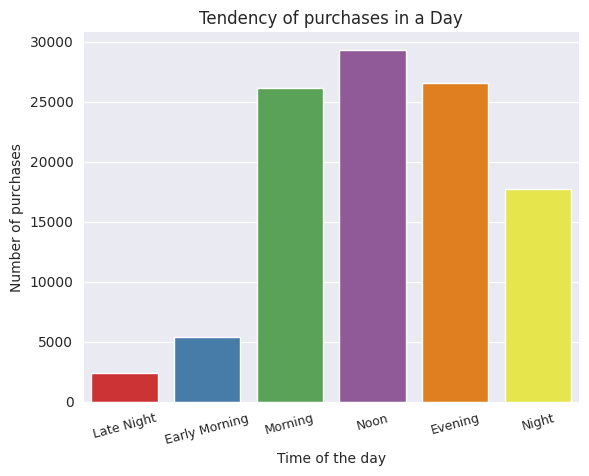

In [ ]:
# create a countplot()

sns.countplot(data=df,
              x='purchase_period')

sns.despine()
plt.title('Tendency of purchases in a Day')
plt.ylabel('Number of purchases')
plt.xlabel('Time of the day')
plt.xticks(rotation=15,fontsize=9)
plt.show()

Tendency of purchase in a Week

In [ ]:
# create a dataframe
# count of purchases on day of a week
purchase_day=df.groupby(['purchase_dayofweek'])[['order_id']].count().rename(columns={'order_id':'count'}).reset_index()

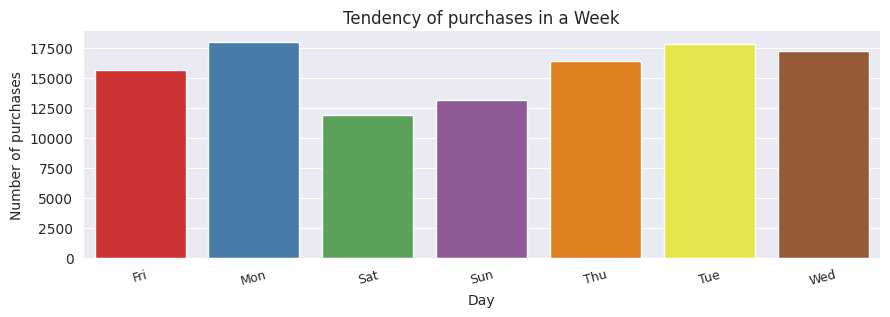

In [ ]:
# create a countplot()

sns.set_palette('Set1')
sns.catplot(data=purchase_day,
              x='purchase_dayofweek',
            y='count',
            kind='bar',
            aspect=3,
            height=3)

sns.despine()
plt.title('Tendency of purchases in a Week')
plt.ylabel('Number of purchases')
plt.xlabel('Day')
plt.xticks(rotation=15,fontsize=9)
plt.show()

## Most number of Customers state-wise


In [ ]:
# top 5 states with most number of customers
top5_state=df['customer_state'].value_counts().head()
top5_state

SP    46435
RJ    14140
MG    12913
RS     6131
PR     5649
Name: customer_state, dtype: int64

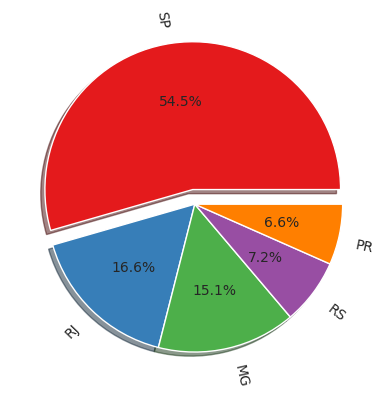

In [ ]:
# plot a pie chart
plt.pie(top5_state,
        labels=top5_state.index,
        autopct='%.1f%%',
        rotatelabels=True,
        explode=(0.1,0.0,0.0,0.0,0.0),
        shadow=True,
        )

plt.show()

Similarly, we can plot a graph for the cities.

## States with least number of Customers.

In [ ]:
bottom5_state=df['customer_state'].value_counts().tail()
bottom5_state

RO    273
AM    163
AC     91
AP     81
RR     46
Name: customer_state, dtype: int64

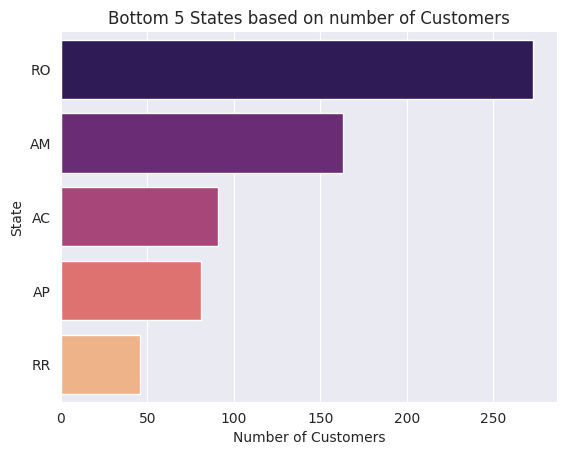

In [ ]:
# a barplot to show the states with least number of customers

sns.barplot(y=bottom5_state.index,
            x=bottom5_state.values,
            palette='magma')

plt.title('Bottom 5 States based on number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('State')
sns.despine()
plt.show()

#Some Intermediate Data Analysis

## Economy of E-Commerce Company

In [ ]:
# total economy per month per year
economy=df.groupby(['purchase_year','purchase_yearmonth'],as_index=False).agg({
    'order_id':'count',
    'price':'sum',
    'freight_value':'sum'
})
economy.head()

,purchase_year,purchase_yearmonth,order_id,price,freight_value
0,2016,2016-09,3,134.97,8.49
1,2016,2016-10,313,40325.11,6165.55
2,2016,2016-12,1,10.90,8.72
3,2017,2017-01,911,111712.47,15654.97
4,2017,2017-02,1845,232638.86,36760.79


In [ ]:
# price per order
economy['price_per_order']=economy['price']/economy['order_id']

# fright value per ordre
economy['freight_per_order']= economy['freight_value']/economy['order_id']

economy.head()


,purchase_year,purchase_yearmonth,order_id,price,freight_value,price_per_order,freight_per_order
0,2016,2016-09,3,134.97,8.49,44.990000,2.830000
1,2016,2016-10,313,40325.11,6165.55,128.834217,19.698243
2,2016,2016-12,1,10.90,8.72,10.900000,8.720000
3,2017,2017-01,911,111712.47,15654.97,122.626202,17.184380
4,2017,2017-02,1845,232638.86,36760.79,126.091523,19.924547


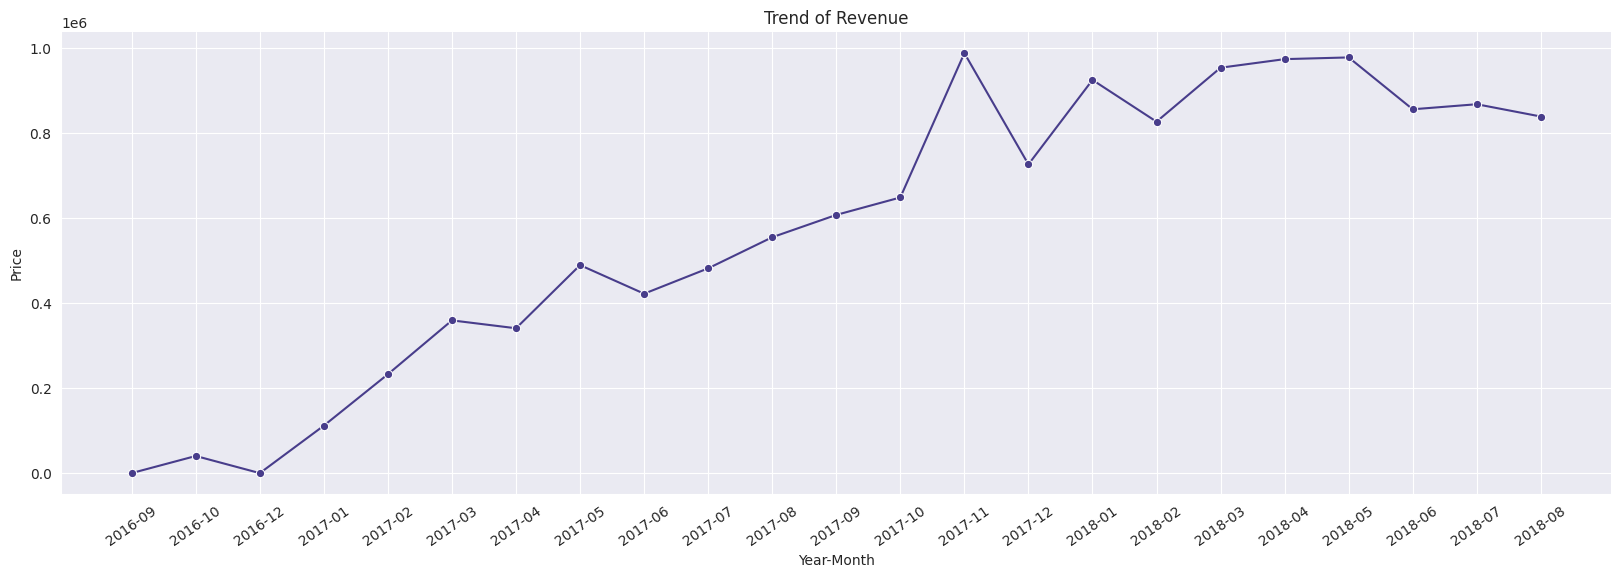

In [ ]:
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
# a line plot to show the trend of income
sns.lineplot(data=economy,
            x='purchase_yearmonth',
            y='price',
            marker='o',
            color='darkslateblue')
plt.xlabel('Year-Month')
plt.ylabel('Price')
plt.title('Trend of Revenue')
plt.xticks(rotation=35)
sns.despine()
plt.show()

## Total revenue generated per state

In [ ]:
df.columns

Index(['order_id', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'price',
       'freight_value', 'purchase_year', 'purchase_month',
       'purchase_yearmonth', 'purchase_dayofweek', 'purchase_period',
       'month_number'],
      dtype='object')

In [ ]:
purchase_price_state=df.groupby('customer_state',as_index=False)[['price']].sum().sort_values('price')

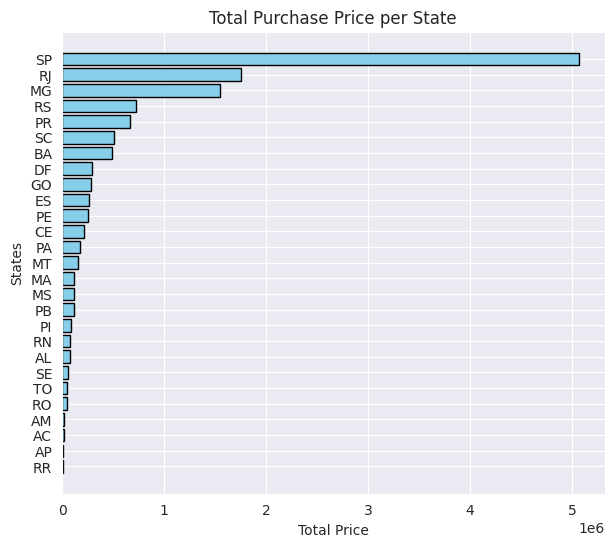

In [ ]:
plt.figure(figsize=(7,6))
plt.barh(y=purchase_price_state['customer_state'],
         width=purchase_price_state['price'],
         color='skyblue',
         edgecolor='black'
         )

plt.title('Total Purchase Price per State')
plt.xlabel('Total Price')
plt.ylabel('States')
plt.show()

## Average Purchase price per State

In [ ]:
avg_purchase_price_state=df.groupby('customer_state',as_index=False)[['price']].mean().sort_values('price')

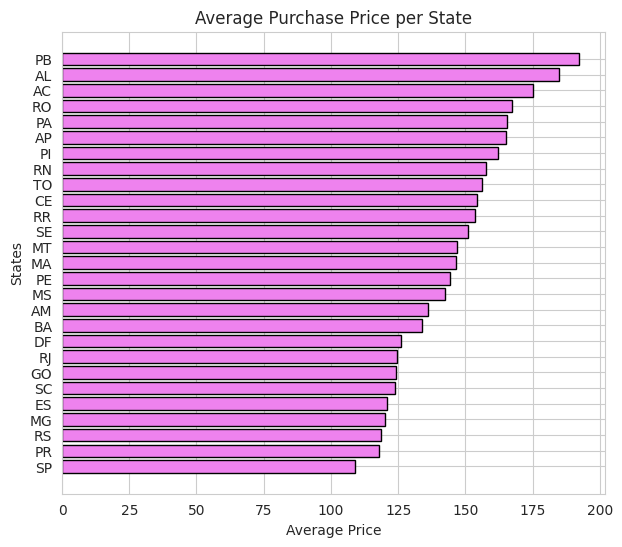

In [ ]:
plt.figure(figsize=(7,6))

sns.set_style('whitegrid')
plt.barh(y=avg_purchase_price_state['customer_state'],
         width=avg_purchase_price_state['price'],
         color='violet',
         edgecolor='black'
         )

plt.title('Average Purchase Price per State')

plt.xlabel('Average Price')
plt.ylabel('States')
plt.show()

In [ ]:
## Trend of Average Shipping Charge

In [ ]:
# remove data of 2016 as it is quite low as compared to 2017 and 2018
ship_trend=economy[economy['purchase_year']!='2016']

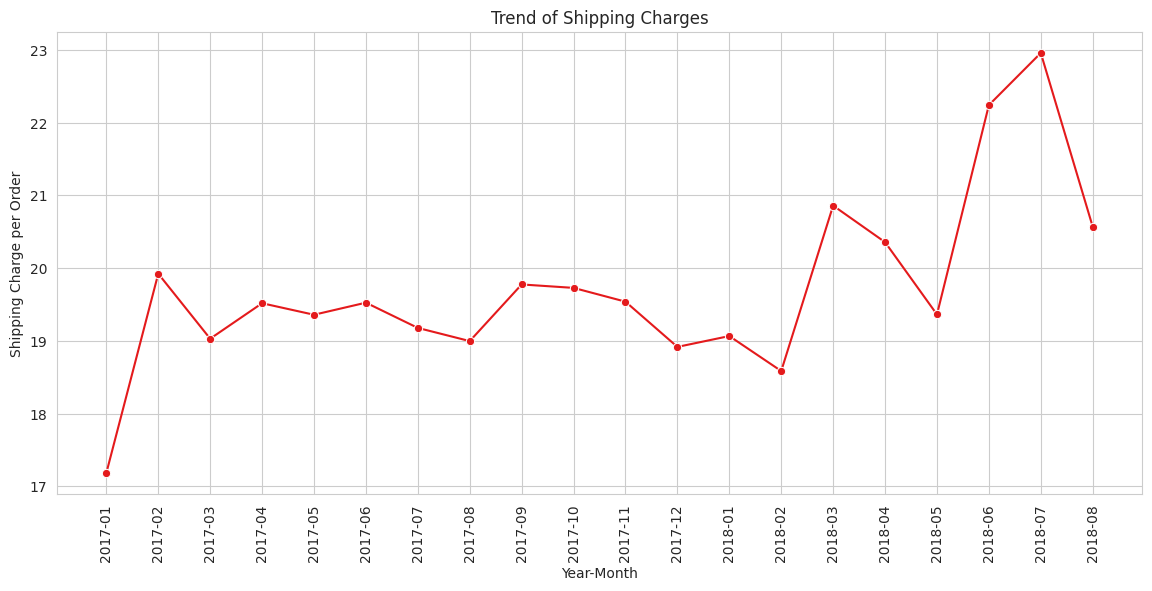

In [ ]:
# plot a line plot to show the trend of shipping charges
plt.figure(figsize=(14,6))
sns.lineplot(data=ship_trend,
             x='purchase_yearmonth',
             y='freight_per_order',
             marker='o')
plt.xticks(rotation=90)
plt.title('Trend of Shipping Charges')
plt.xlabel('Year-Month')
plt.ylabel('Shipping Charge per Order')
plt.show()

## Total Shipping Charge per State

In [ ]:
# total shipment charge per state
ship_state=df.groupby(['customer_state'])[['freight_value']].sum().sort_values(by='freight_value')

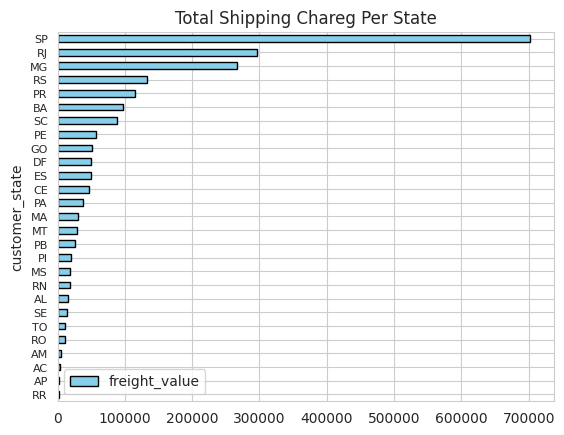

In [ ]:

# a bar plot to show the total shipment charge per state
ship_state.plot(kind='barh',color='skyblue',
                edgecolor='black')
plt.yticks(fontsize=8)
plt.title('Total Shipping Chareg Per State')
plt.show()

# Delivery Analysis

In [ ]:
# create a copy of df dataframe
delivery= df.copy()

In [ ]:
# time to deliver the product
# delivery date - purchase date
# convert the time into hours

delivery['time_to_deliver']=(delivery['order_delivered_customer_date']- delivery['order_purchase_timestamp'])/np.timedelta64(1, 'h')

In [ ]:
# difference between estimated and actual delivery
# estimated date - delivery date
# convert the time into hours

delivery['diff_estimate_delivery']=(delivery['order_estimated_delivery_date']- delivery['order_delivered_customer_date'])/np.timedelta64(1, 'h')

In [ ]:
# difference between estimate and delivery in hours
delivery['diff_estimate_delivery']

0         170.579722
1         128.537500
2         413.891944
3         311.521667
4         221.716111
             ...    
112645     30.367778
112646    132.595278
112647    480.451667
112648    480.451667
112649    418.858333
Name: diff_estimate_delivery, Length: 110173, dtype: float64

The values are positive. It implies that the estimate delivery date is greater than actual delivery date.
All products are deliverd before estimated delivery date.

In [ ]:
# use groupby to group the data based on State
# get mean of shipping price, mean of time to deliver, mean of diff_estimate_delivery

state_delivery=delivery.groupby('customer_state',as_index=False).agg({'freight_value':'mean','time_to_deliver':'mean','diff_estimate_delivery':'mean'})
state_delivery.head()

,customer_state,freight_value,time_to_deliver,diff_estimate_delivery
0,AC,40.047912,497.173199,487.988181
1,AL,35.870656,587.739403,193.376353
2,AM,33.310613,633.383212,461.424899
3,AP,34.160494,676.943035,426.441255
4,BA,26.487556,461.942831,246.925482


In [ ]:
# highest average shipping price
state_shipping=state_delivery[['customer_state','freight_value']].sort_values(by='freight_value',ascending=False)
state_shipping.head()

,customer_state,freight_value
14,PB,43.091689
21,RR,43.088043
20,RO,41.330549
0,AC,40.047912
16,PI,39.115086


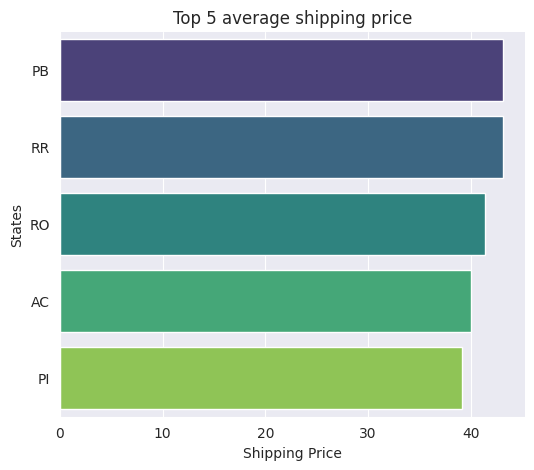

In [ ]:
# barplot to show highest average shipping price
sns.set_style('darkgrid')
plt.figure(figsize=(6,5))
sns.barplot(data=state_shipping.head(),
            y='customer_state',
            x='freight_value',
            palette='viridis')

plt.title('Top 5 average shipping price')
plt.xlabel('Shipping Price')
plt.ylabel('States')
sns.despine()
plt.show()

In [ ]:
# lowest average shipping price
state_shipping=state_delivery[['customer_state','freight_value']].sort_values(by='freight_value',ascending=False)
state_shipping.tail()

,customer_state,freight_value
6,DF,21.072161
18,RJ,20.912704
10,MG,20.627192
17,PR,20.471816
25,SP,15.114601


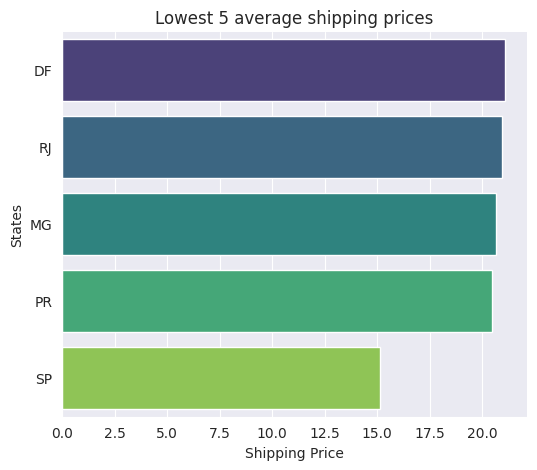

In [ ]:
# barplot to show highest average shipping price
sns.set_style('darkgrid')
plt.figure(figsize=(6,5))
sns.barplot(data=state_shipping.tail(),
            y='customer_state',
            x='freight_value',
            palette='viridis')

plt.title('Lowest 5 average shipping prices')
plt.xlabel('Shipping Price')
plt.ylabel('States')
sns.despine()
plt.show()

### Delivery Variance


The difference between the estimated delivery date and the actual delivery date is commonly referred to as the "delivery variance" or "delivery deviation.


In [ ]:
# highest average difference between estimate and delivery time
state_diff_estimate_delivery=state_delivery[['customer_state','diff_estimate_delivery']].sort_values(by='diff_estimate_delivery',ascending=False)
state_diff_estimate_delivery.head()

,customer_state,diff_estimate_delivery
0,AC,487.988181
20,RO,464.186358
2,AM,461.424899
3,AP,426.441255
21,RR,422.841002


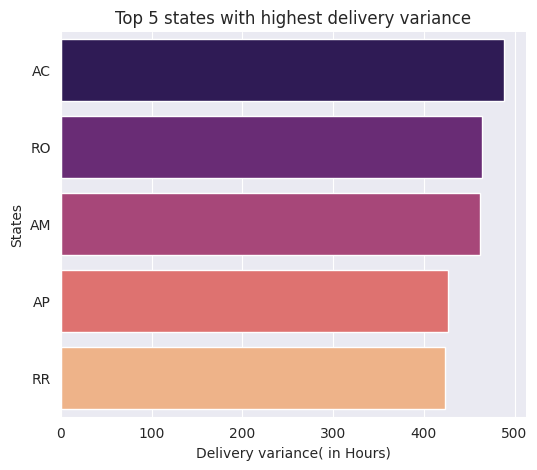

In [ ]:
# barplot to show highest average difference between estimate and delivery time
sns.set_style('darkgrid')
plt.figure(figsize=(6,5))
sns.barplot(data=state_diff_estimate_delivery.head(),
            y='customer_state',
            x='diff_estimate_delivery',
            palette='magma')

plt.title('Top 5 states with highest delivery variance')
plt.xlabel('Delivery variance( in Hours)')
plt.ylabel('States')
sns.despine()
plt.show()

In [ ]:
# lowest difference between estimate and delivery time
state_diff_estimate_delivery=state_delivery[['customer_state','diff_estimate_delivery']].sort_values(by='diff_estimate_delivery',ascending=False)
state_diff_estimate_delivery.tail()

,customer_state,diff_estimate_delivery
4,BA,246.925482
7,ES,238.781078
24,SE,223.817613
9,MA,220.860777
1,AL,193.376353


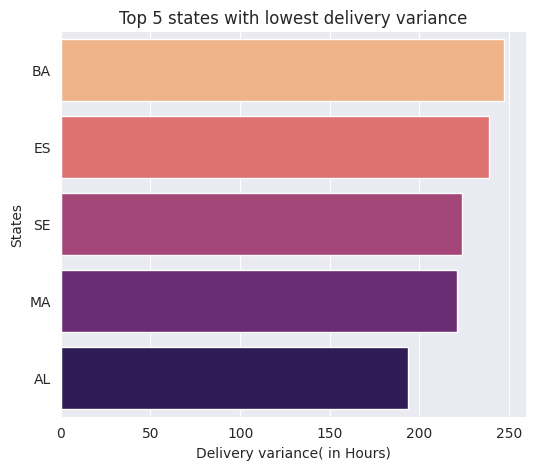

In [ ]:
# barplot to show lowest delivery variance
sns.set_style('darkgrid')
plt.figure(figsize=(6,5))
sns.barplot(data=state_diff_estimate_delivery.tail(),
            y='customer_state',
            x='diff_estimate_delivery',
            palette='magma_r')

plt.title('Top 5 states with lowest delivery variance')
plt.xlabel('Delivery variance( in Hours)')
plt.ylabel('States')
sns.despine()
plt.show()

In [ ]:
# longest average time to deliver per state
state_time_delivery=state_delivery[['customer_state','time_to_deliver']].sort_values(by='time_to_deliver',ascending=False)
state_time_delivery.head()

,customer_state,time_to_deliver
21,RR,677.544275
3,AP,676.943035
2,AM,633.383212
1,AL,587.739403
13,PA,570.097281


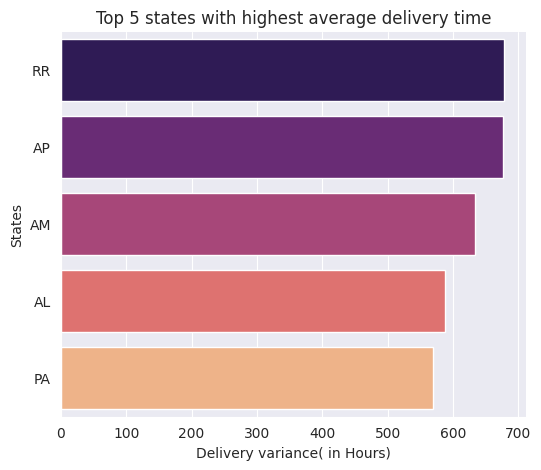

In [ ]:
# barplot to show highest average delivery time
sns.set_style('darkgrid')
plt.figure(figsize=(6,5))
sns.barplot(data=state_time_delivery.head(),
            y='customer_state',
            x='time_to_deliver',
            palette='magma')

plt.title('Top 5 states with highest average delivery time')
plt.xlabel('Delivery variance( in Hours)')
plt.ylabel('States')
sns.despine()
plt.show()

In [ ]:
# shortest average time to deliver per state
state_time_delivery=state_delivery[['customer_state','time_to_deliver']].sort_values(by='time_to_deliver',ascending=False)
state_time_delivery.tail()

,customer_state,time_to_deliver
23,SC,359.943437
6,DF,311.015835
10,MG,287.556996
17,PR,286.733214
25,SP,209.343141


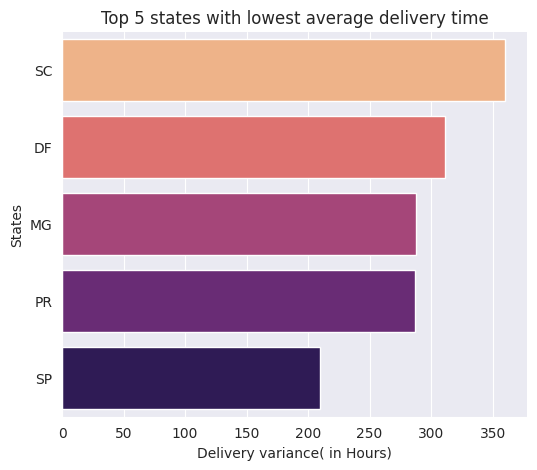

In [ ]:
# barplot to show lowest average delivery time
sns.set_style('darkgrid')
plt.figure(figsize=(6,5))
sns.barplot(data=state_time_delivery.tail(),
            y='customer_state',
            x='time_to_deliver',
            palette='magma_r')

plt.title('Top 5 states with lowest average delivery time')
plt.xlabel('Delivery variance( in Hours)')
plt.ylabel('States')
sns.despine()
plt.show()

In [ ]:
# #cust=pd.read_csv(url1)
# geo=pd.read_csv(url2)
# od_items=pd.read_csv(url3)
# od_payment=pd.read_csv(url4)
# od_review= pd.read_csv(url5)
# orders=pd.read_csv(url6)
# product_cat=pd.read_csv(url7)
# products=pd.read_csv(url8)
# sellers= pd.read_csv(url10)


In [ ]:
od_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
od_payment['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [ ]:
payment=df.merge(od_payment,on='order_id',how='inner')
payment.head()

,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,...,purchase_year,purchase_month,purchase_yearmonth,purchase_dayofweek,purchase_period,month_number,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,...,2017,Oct,2017-10,Mon,Morning,10,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,...,2017,Oct,2017-10,Mon,Morning,10,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,...,2017,Oct,2017-10,Mon,Morning,10,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1,...,2018,Jul,2018-07,Tue,Evening,07,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,...,2018,Aug,2018-08,Wed,Early Morning,08,1,credit_card,3,179.12


In [ ]:
payment_mode=payment['payment_type'].value_counts()

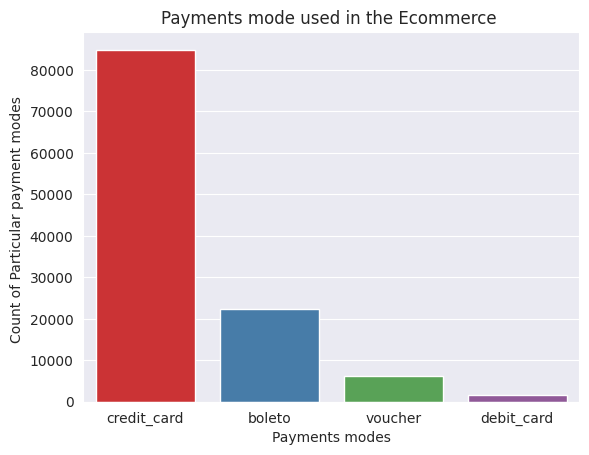

In [ ]:
sns.barplot(x=payment_mode.index,y=payment_mode.values)
plt.title("Payments mode used in the Ecommerce ")
plt.xlabel("Payments modes")
plt.ylabel("Count of Particular payment modes ")
plt.show()

# Building Machine Learning Models
In this section, we will create a model that can perform customer segmentation. Customer segmentation itself is an unsupervised problem so that our data does not have a label, but later we ourselves will provide a label. Algorithm that can be used:



*   RFM Segmentation
*   K means
*   Agglomerative Clustering





## RFM Segmentation

RFM stands for Recency, Frequency and Monetary. Each factor adjusts to the characteristics of customer. This RFM metric is an important indicator of customer behavior segmentation because frequency and monetary affect customer lifetime value, and recency affects engagement rate.

The RFM Analysis application on this data aims to segment customers, so that e-commerce can apply sales/marketing strategies that suit the characteristics of these customers.

# DataSet Preparation

In [ ]:
from datetime import datetime, timedelta

# Modeling
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Evaluation
from sklearn.metrics import silhouette_score

#Scaling
from sklearn.preprocessing import StandardScaler

# Regular Expression
import re

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1=pd.merge(delivery,od_payment,on='order_id',how='inner')

In [ ]:
# drop columns
df1= df1.drop(['payment_installments', 'payment_sequential'], axis = 1)


In [ ]:
# Group data by customer_unique_id
rfm = df1.groupby(['customer_unique_id']).agg({
    'order_purchase_timestamp': lambda x: (df1['order_purchase_timestamp'].max() - x.max()).days,
    'order_id': 'count',
    'price': 'sum'
})

In [ ]:
# rename the columns
rfm.rename(columns={'order_purchase_timestamp':'recency',
                    'order_id':'frequency',
                    'price':'monetary'},inplace=True)

In [ ]:
# Assign score
rfm['recency_score'] = pd.qcut(rfm['recency'], q=4, labels=list(range(4, 0, -1)))
rfm['frequency_score'] = pd.qcut(rfm['frequency'], q=4, labels=list(range(4,5)), duplicates='drop' )
rfm['monetary_score'] = pd.qcut(rfm['monetary'], q=4, labels=list(range(1, 5)), duplicates='drop')

# Create RFM_Score
rfm['RFM_Score'] = rfm[['recency_score', 'frequency_score', 'monetary_score']].sum(axis=1)

In [ ]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_Score
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90,4,4,3,11
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,3,4,1,8
0000f46a3911fa3c0805444483337064,536,1,69.00,1,4,2,7
0000f6ccb0745a6a4b88665a16c9f078,320,1,25.99,2,4,1,7
0004aac84e0df4da2b147fca70cf8255,287,1,180.00,2,4,4,10


# K Means

In [ ]:
x = rfm[['recency', 'frequency', 'monetary']]

In [ ]:
#scale
scaler = StandardScaler()

# Data Scale
x_scaled = scaler.fit_transform(x)

In [ ]:
score = []
number_of_clusters = range(2,9)

for i in number_of_clusters:
  kmeans = KMeans(i)
  kmeans.fit(x_scaled)

  label = kmeans.labels_
  score.append(silhouette_score(x_scaled, label, metric = 'euclidean'))

In [ ]:
for i in range(len(score)):
  print(f'Silhoutte Score of {i+2} Cluster', round(score[i], 3))

Silhoutte Score untuk 2 Cluster 0.388
Silhoutte Score untuk 3 Cluster 0.421
Silhoutte Score untuk 4 Cluster 0.44
Silhoutte Score untuk 5 Cluster 0.446
Silhoutte Score untuk 6 Cluster 0.368
Silhoutte Score untuk 7 Cluster 0.381
Silhoutte Score untuk 8 Cluster 0.412


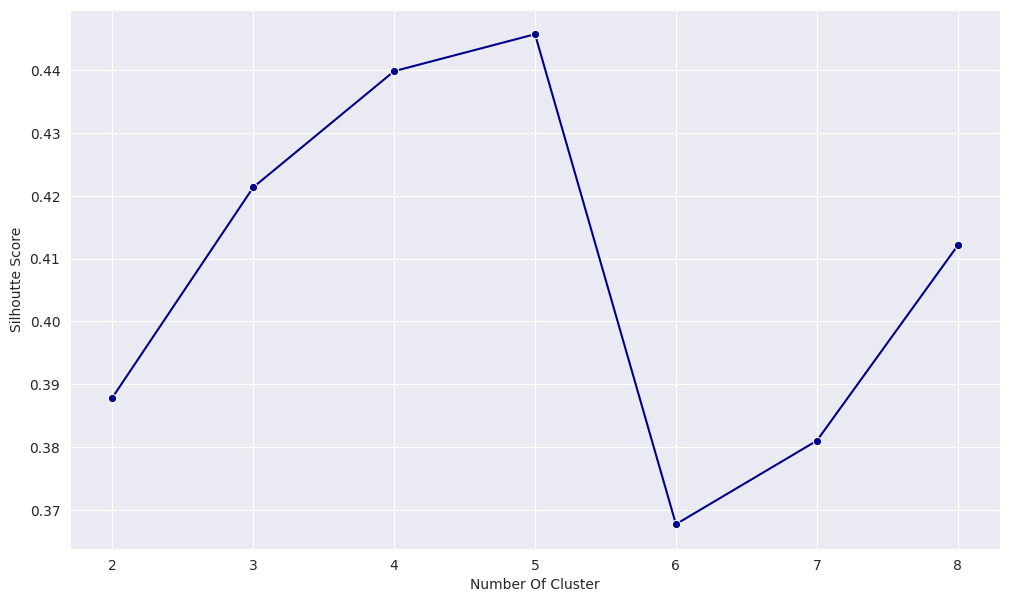

In [ ]:
plt.figure(figsize = (12, 7))

sns.lineplot(x=number_of_clusters, y=score , color="darkblue",marker='o')
plt.xlabel("Number Of Cluster")
plt.ylabel('Silhoutte Score')
plt.show()



*   The best Silhoutte Score is obtained in cluster 6
*   We decided not to use 6 clusters because the clusters that are formed are
most likely only customers with frequency 1 time with low monetary and customers outside the cluster
*   We will use 5 clusters because 5 clusters have the highest silhoutte score after 6






In [ ]:
kmeans = KMeans(n_clusters=5, random_state=10)
kmeans.fit(x_scaled)

rfm['label k-means'] = kmeans.labels_

In [ ]:
label = rfm['label k-means']
score = silhouette_score(x_scaled, label, metric = 'euclidean')
score

0.4462429734848587

In [ ]:
def label(x):
  if x == 0:
    return 'New Customer'
  elif x == 1:
    return 'Hibernating'
  elif x == 2:
    return 'Need to focus'
  elif x == 3:
    return 'Potential loyalists'
  else:
    return 'VIP'

rfm['label k-means'] = rfm['label k-means'].apply(label)

In [ ]:
#counting the number of each types of customer
rfm['label k-means'].value_counts()

Hibernating            50737
New Customer           37182
VIP                     3363
Potential loyalists     1931
Need to focus            122
Name: label k-means, dtype: int64

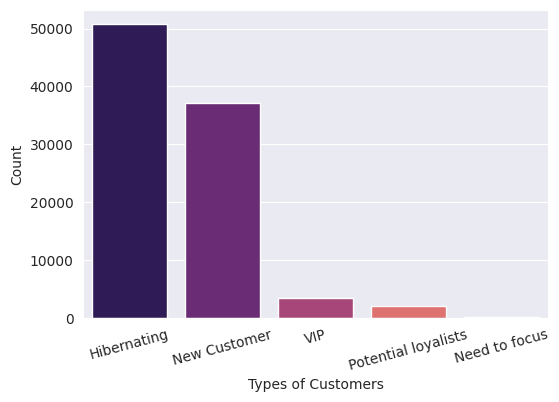

In [ ]:
#plotting the count of each types of customers
plt.figure(figsize=(6, 4))
sns.countplot(x='label k-means', data=rfm, palette='magma')
plt.xlabel("Types of Customers")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.show()

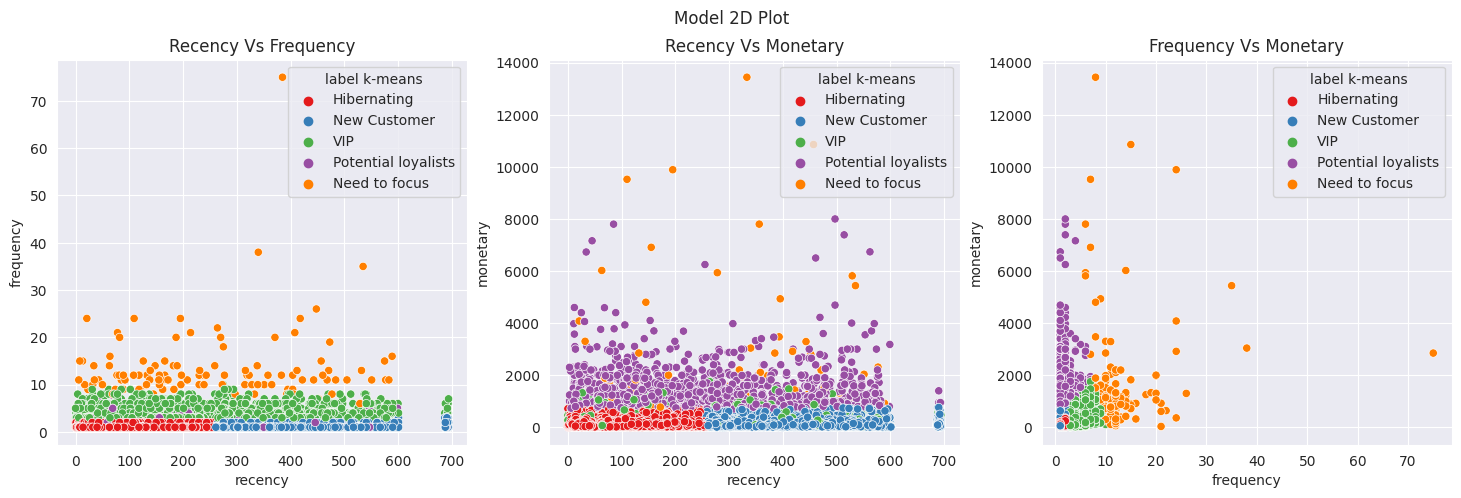

In [ ]:
plt.figure(figsize =(18,5))

# Recency vs Frequency
plt.subplot(131)
sns.scatterplot(x = 'recency', y = 'frequency', hue = 'label k-means', data = rfm)
plt.title('Recency Vs Frequency')

# Recency Vs Monetary
plt.subplot(132)
sns.scatterplot(x = 'recency', y = 'monetary', hue = 'label k-means', data = rfm)
plt.title('Recency Vs Monetary')

# Frequency Vs Monetary
plt.subplot(133)
sns.scatterplot(x = 'frequency', y = 'monetary', hue = 'label k-means', data = rfm)
plt.title('Frequency Vs Monetary')

plt.suptitle('Model 2D Plot')
plt.show()